In [65]:
#install.packages("igraph")
#install.packages("threejs")

In [66]:
#library(igraph)
#library(threejs)

In [3]:
friends_edges <- read.csv("Friendship network edge data.csv", header = TRUE)
head(friends_edges)

,name1,name2,hours
,<chr>,<chr>,<int>
1,Joe,Ronald,1
2,Joe,Michael,3
3,Joe,Troy,2
4,Erin,Kelley,3
5,Kelley,Valentine,5
6,Ronald,Troy,1


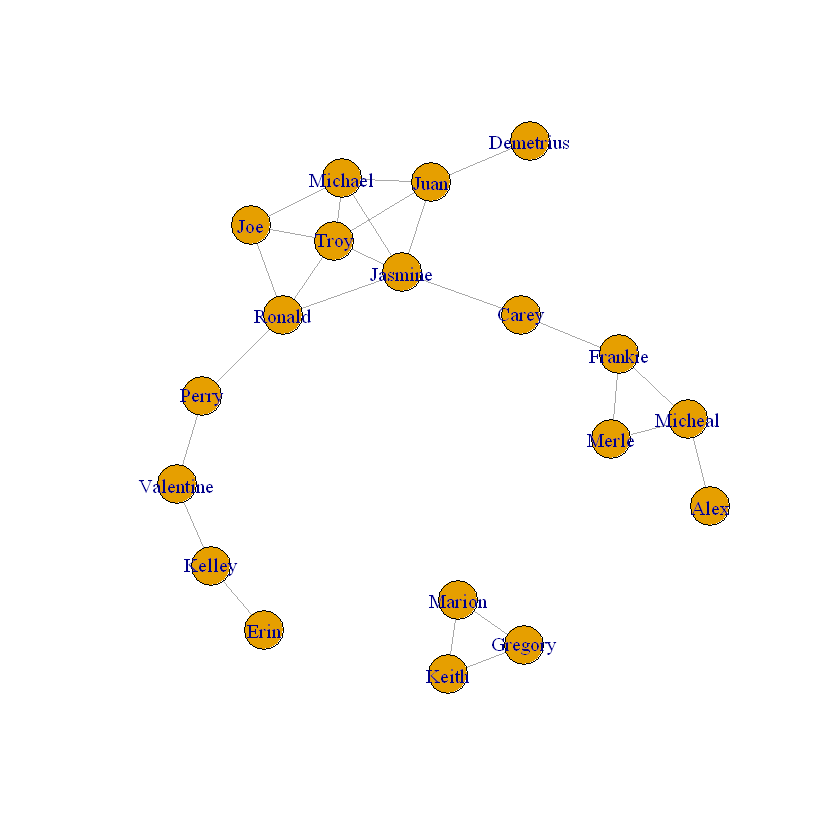

In [4]:
# Convert friends dataframe to a matrix (Only two column frames can be passed) 
friends.mat <- as.matrix(friends_edges[,1:2])

# Convert friends matrix to an igraph object
g <- graph.edgelist(friends.mat, directed = FALSE)

# Plot the graph
plot(g)

#### Get the Count of the Edges and the Vertices

In [5]:
# Subset vertices and edges
V(g)
E(g)

# Count number of edges
gsize(g)

# Count number of vertices
gorder(g)

+ 19/19 vertices, named, from 6bb0726:
 [1] Joe       Ronald    Michael   Troy      Erin      Kelley    Valentine
 [8] Perry     Jasmine   Juan      Carey     Demetrius Frankie   Micheal  
[15] Merle     Alex      Keith     Gregory   Marion   

+ 25/25 edges from 6bb0726 (vertex names):
 [1] Joe      --Ronald    Joe      --Michael   Joe      --Troy     
 [4] Erin     --Kelley    Kelley   --Valentine Ronald   --Troy     
 [7] Ronald   --Perry     Ronald   --Jasmine   Michael  --Troy     
[10] Michael  --Jasmine   Michael  --Juan      Valentine--Perry    
[13] Troy     --Jasmine   Troy     --Juan      Jasmine  --Juan     
[16] Jasmine  --Carey     Juan     --Demetrius Carey    --Frankie  
[19] Frankie  --Micheal   Frankie  --Merle     Micheal  --Merle    
[22] Micheal  --Alex      Keith    --Gregory   Keith    --Marion   
[25] Gregory  --Marion   

[1] 25

[1] 19

#### Set Vertex and Edges Attributes

In [6]:
friends_nodes <- read.csv("Friendship network node data.csv", header = TRUE)
head(friends_nodes)

# Inspect the objects 'genders' and 'ages'
genders <- friends_nodes$gender

# Create new vertex attribute called 'gender'
g <- set_vertex_attr(g, "gender", value = genders)

# View all vertex attributes in a list
vertex_attr(g)

# View attributes of first five vertices in a dataframe
V(g)[[1:5]]

,name,gender
,<chr>,<chr>
1,Joe,M
2,Erin,F
3,Kelley,F
4,Ronald,M
5,Michael,M
6,Valentine,F


$name
 [1] "Joe"       "Ronald"    "Michael"   "Troy"      "Erin"      "Kelley"   
 [7] "Valentine" "Perry"     "Jasmine"   "Juan"      "Carey"     "Demetrius"
[13] "Frankie"   "Micheal"   "Merle"     "Alex"      "Keith"     "Gregory"  
[19] "Marion"   

$gender
 [1] "M" "F" "F" "M" "M" "F" "M" "F" "M" "F" "F" "M" "M" "M" "M" "M" "M" "F" "F"

+ 5/19 vertices, named, from 6bb0726:
     name gender
1     Joe      M
2  Ronald      F
3 Michael      F
4    Troy      M
5    Erin      M

In [7]:
# View hours
hours <- friends_edges$hours

# Create new edge attribute called 'hours'
g <- set_edge_attr(g, 'hours', value = hours)

# View edge attributes of graph object
edge_attr(g)

# Find all edges that include "Britt"
E(g)[[.inc('Erin')]]  

# Find all pairs that spend 4 or more hours together per week
E(g)[[hours>=4]]  

$hours
 [1] 1 3 2 3 5 1 3 5 2 1 3 5 3 2 6 1 2 2 1 1 2 1 1 3 2

+ 1/25 edge from 6bb0726 (vertex names):
  tail   head tid hid hours
4 Erin Kelley   5   6     3

+ 4/25 edges from 6bb0726 (vertex names):
        tail      head tid hid hours
5     Kelley Valentine   6   7     5
8     Ronald   Jasmine   2   9     5
12 Valentine     Perry   7   8     5
15   Jasmine      Juan   9  10     6

#### Create Graph from DataFrame

+ 4/25 edges from 6bee521 (vertex names):
        tail      head tid hid hours
5     Kelley Valentine   3   6     5
8     Ronald   Jasmine   4   8     5
12 Valentine     Perry   6  15     5
15   Jasmine      Juan   8   9     6

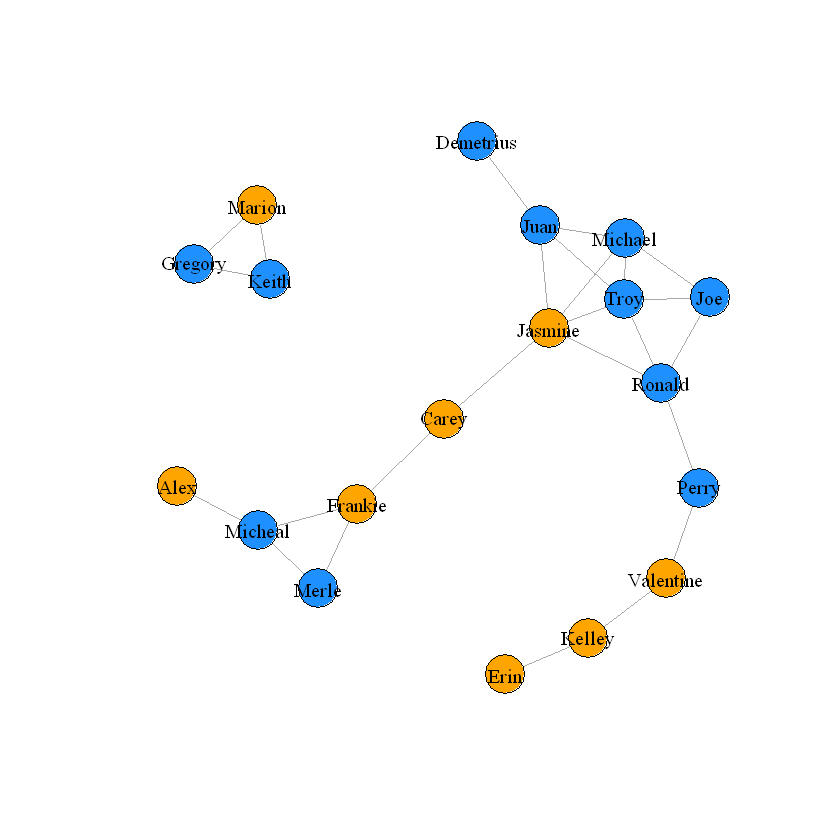

In [8]:
# Create an igraph object with attributes directly from dataframes
g1 <- graph_from_data_frame(d = friends_edges, vertices = friends_nodes, directed = FALSE)


# Subset edges greater than or equal to 5 hours
E(g1)[[hours>=5]]  


# Set vertex color by gender
V(g1)$color <- ifelse(V(g1)$gender == 'F', "orange", "dodgerblue")

# Plot the graph
plot(g1, vertex.label.color = "black")


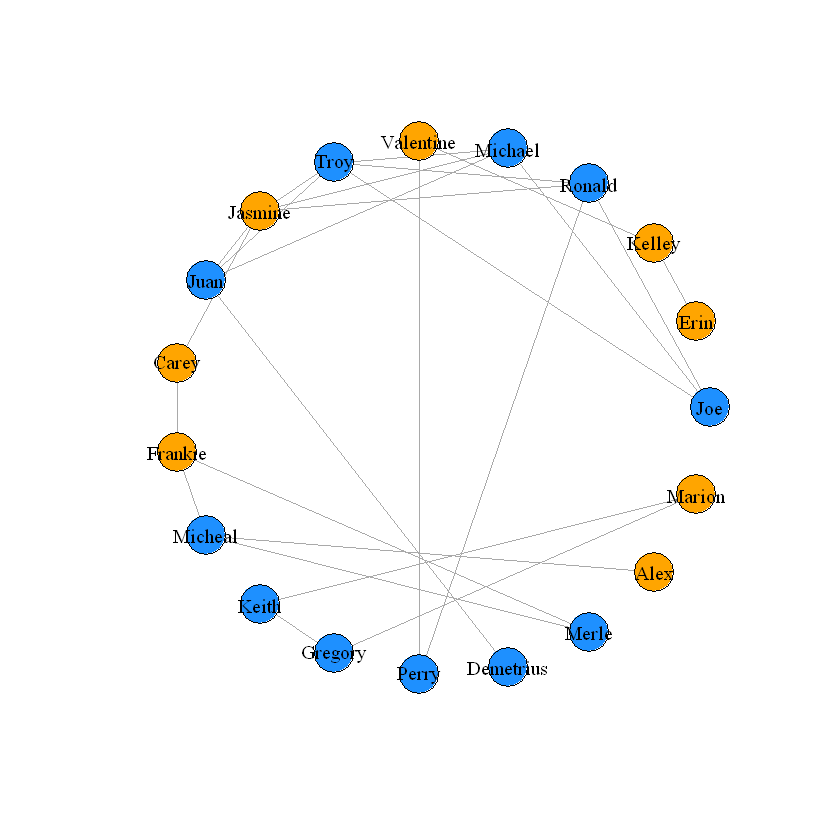

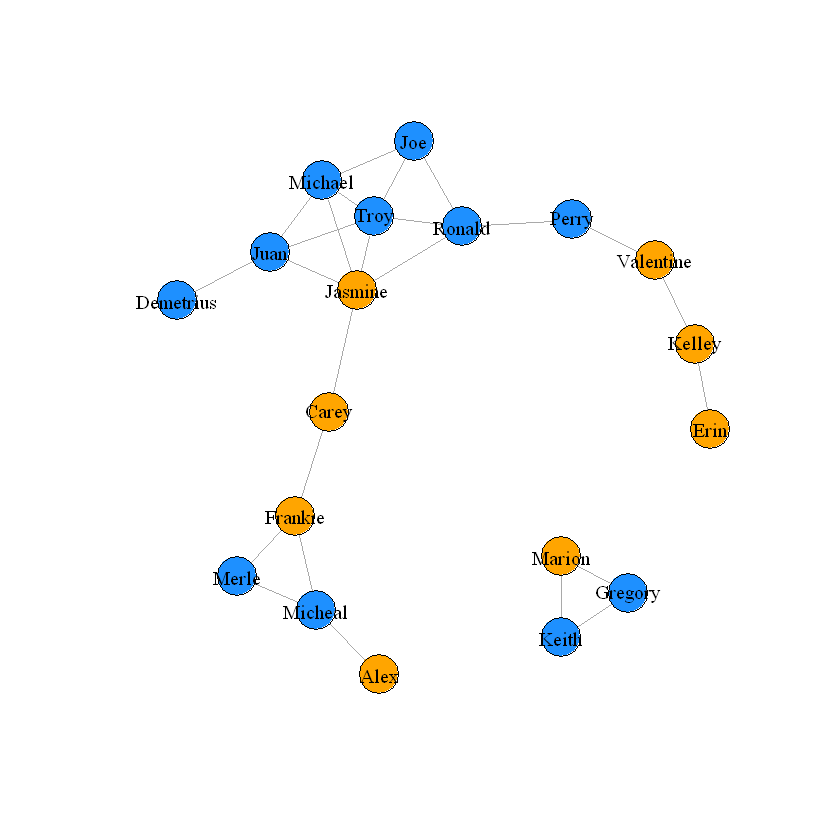

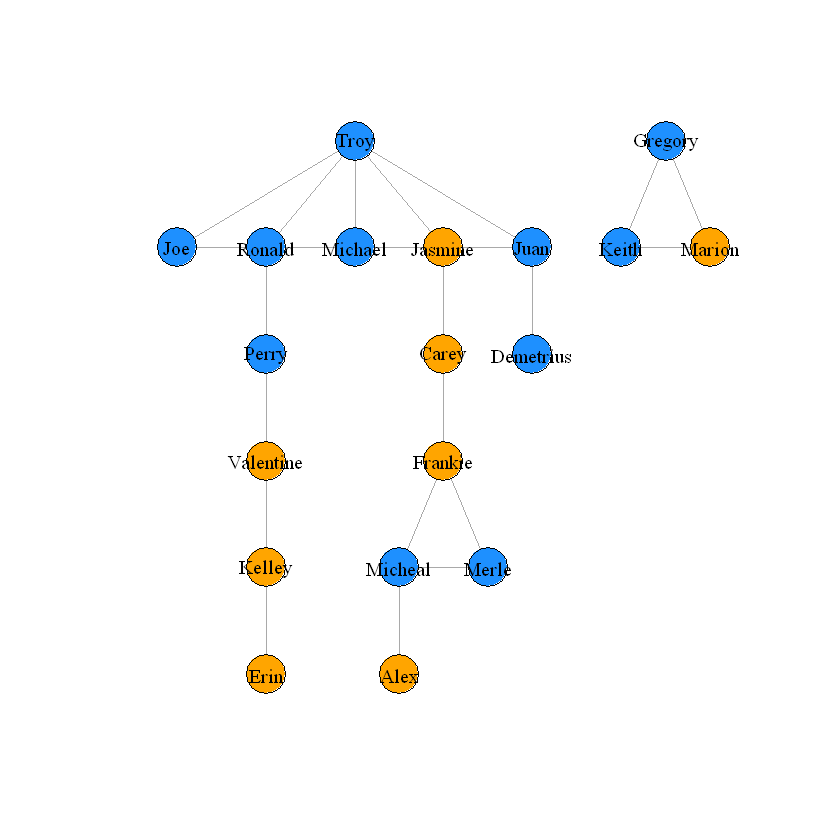

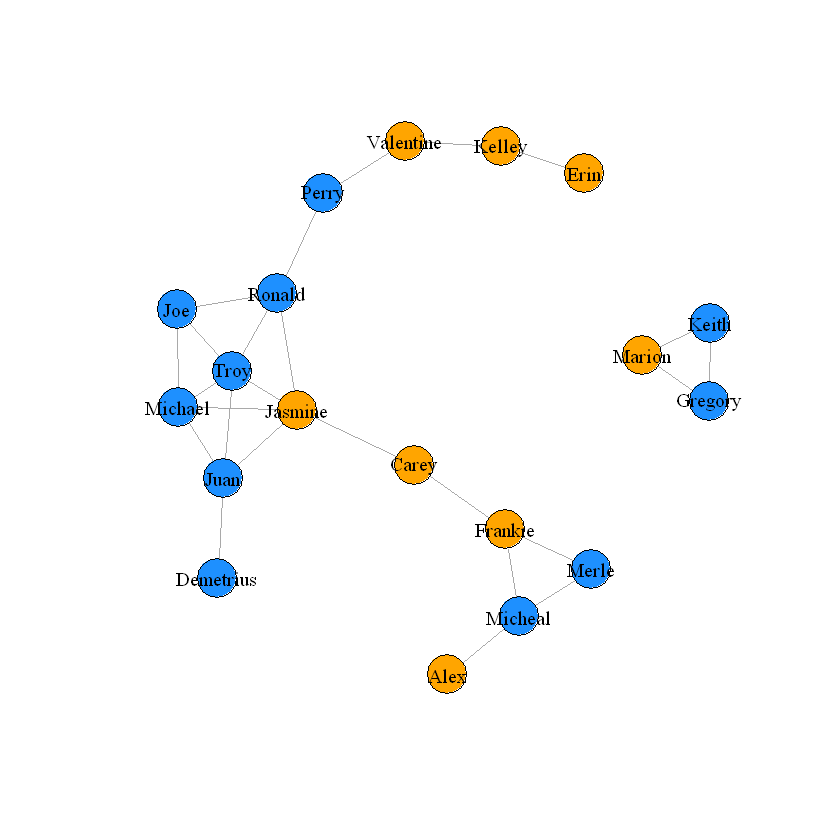

In [9]:
# Plot the graph object g1 in a circle layout
plot(g1, vertex.label.color = "black", layout = layout_in_circle(g1))

# Plot the graph object g1 in a Fruchterman-Reingold layout 
plot(g1, vertex.label.color = "black", layout = layout_with_fr(g1))

# Plot the graph object g1 in a Tree layout 
m <- layout_as_tree(g1)
plot(g1, vertex.label.color = "black", layout = m)

# Plot the graph object g1 using igraph's chosen layout 
n <- layout_nicely(g1)
plot(g1, vertex.label.color = "black", layout = n)

#### Change the size of the edge and delete the ones that r not that important 

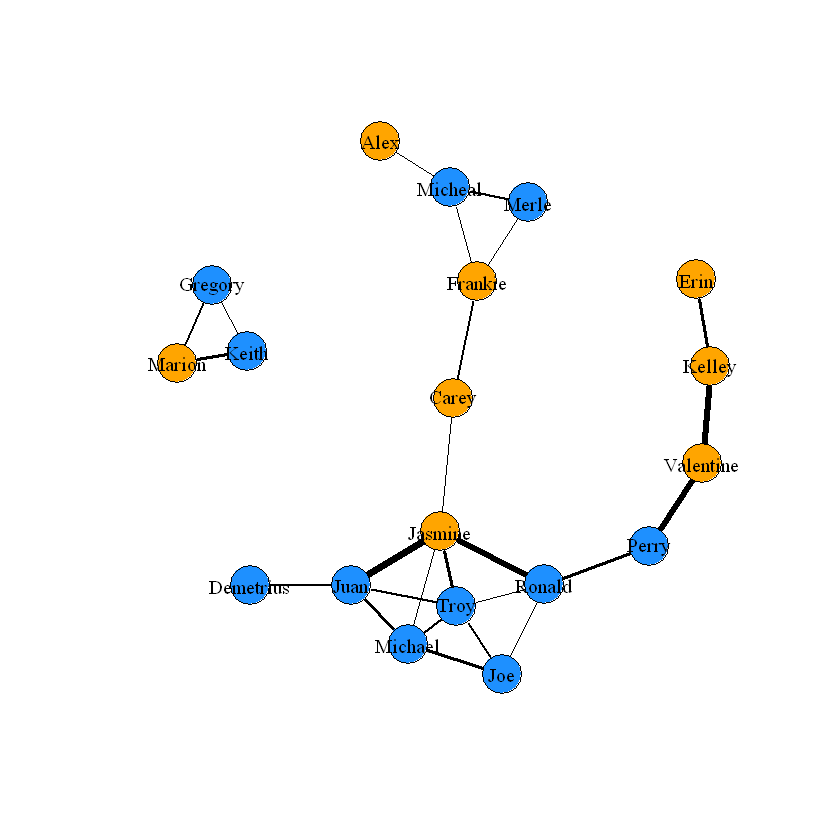

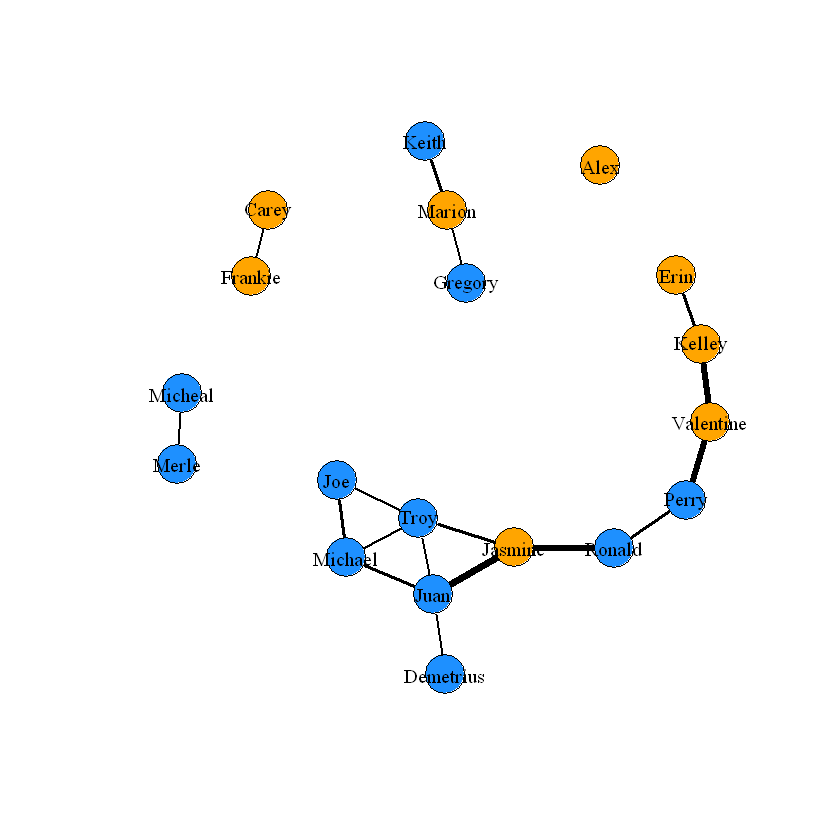

In [10]:
# Create a vector of weights based on the number of hours each pair spend together
w1 <- E(g1)$hours

# Plot the network varying edges by weights
m1 <- layout_nicely(g1)
plot(g1, 
        vertex.label.color = "black", 
        edge.color = 'black',
        edge.width = w1,
        layout = m1)


# Create a new igraph object by deleting edges that are less than 2 hours long 
g2 <- delete_edges(g1, E(g1)[hours < 2])


# Plot the new graph 
w2 <- E(g2)$hours
m2 <- layout_nicely(g2)

plot(g2, 
     vertex.label.color = "black", 
     edge.color = 'black',
     edge.width = w2,
     layout = m2)


#### Directed Graphs 

In [34]:
measles <- read.csv("Measles network data.csv", header = TRUE)
head(measles)

# Get the graph object
g <- graph_from_data_frame(measles, directed = TRUE)

# is the graph directed?
is.directed(g)

# Is the graph weighted?
is.weighted(g)

# Where does each edge originate from?
my_table <- table(head_of(g, E(g)))


,from,to
,<int>,<int>
1,45,1
2,45,2
3,172,3
4,180,4
5,45,5
6,180,6


[1] TRUE

[1] FALSE

[1] 1

[1] 0

+ 6/184 edges from 6c67e30 (vertex names):
[1] 184->45  184->182 184->181 184->178 184->183 184->177

+ 6/184 edges from 6c67e30 (vertex names):
[1] 184->45  184->182 184->181 184->178 184->183 184->177

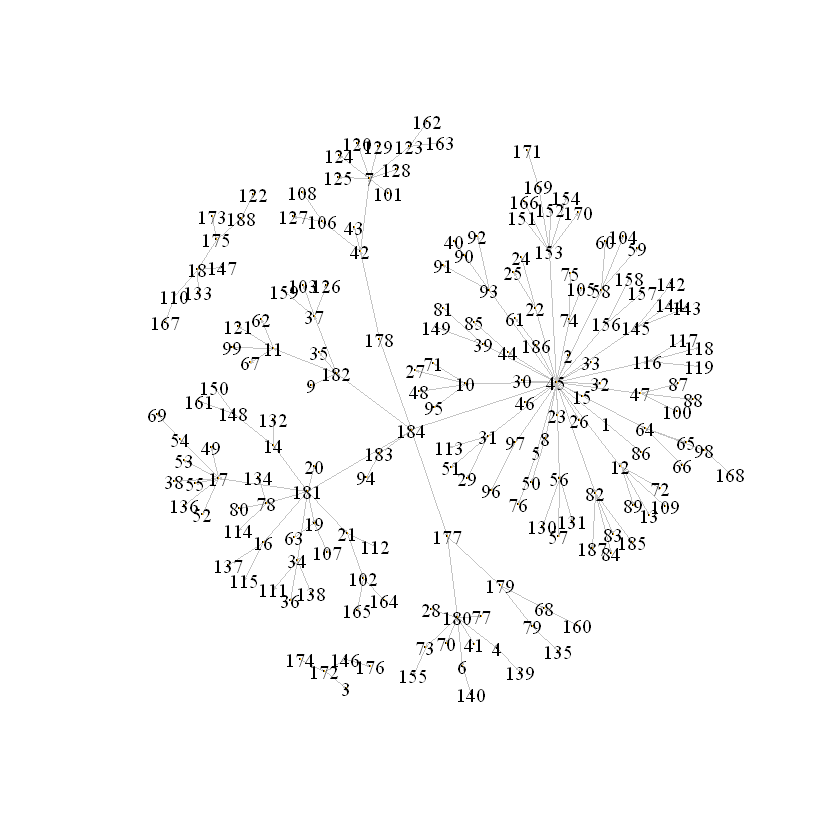

In [12]:
# Make a basic plot
plot(g, 
     vertex.label.color = "black", 
     edge.color = 'gray77',
     vertex.size = 0,
     edge.arrow.size = 0.1,
     layout = layout_nicely(g))

# Is there an edge going from vertex 184 to vertex 178?
g['184', '178']

# Is there an edge going from vertex 178 to vertex 184?
g['178', '184']

# Show all edges going to or from vertex 184
incident(g, '184', mode = c("all"))

# Show all edges going out from vertex 184
incident(g, '184', mode = c("out"))

In [13]:
# Identify all neighbors of vertex 12 regardless of direction
neighbors(g, '12', mode = c('all'))

# Identify other vertices that direct edges towards vertex 12
neighbors(g, '12', mode = c('in'))

# Identify any vertices that receive an edge from vertex 42 and direct an edge to vertex 124
n1 <- neighbors(g, '42', mode = c('out'))
n2 <- neighbors(g, '124', mode = c('in'))
intersection(n1, n2)

+ 5/187 vertices, named, from 6c67e30:
[1] 45  13  72  89  109

+ 1/187 vertex, named, from 6c67e30:
[1] 45

+ 1/187 vertex, named, from 6c67e30:
[1] 7

#### The inter-connectivity of a network can be assessed by examining the number and length of paths between vertices. A path is simply the chain of connections between vertices. 

In [14]:
# Which two vertices are the furthest apart in the graph ?
farthest_vertices(g) 

# Shows the path sequence between two furthest apart vertices.
get_diameter(g)  

# Identify vertices that are reachable within two connections from vertex 42
ego(g, 2, '42', mode = c('out'))

# Identify vertices that can reach vertex 42 within two connections
ego(g, 2, '42', mode = c('in'))

$vertices
+ 2/187 vertices, named, from 6c67e30:
[1] 184 162

$distance
[1] 5


+ 6/187 vertices, named, from 6c67e30:
[1] 184 178 42  7   123 162

[[1]]
+ 13/187 vertices, named, from 6c67e30:
 [1] 42  7   106 43  123 101 120 124 125 128 129 108 127


[[1]]
+ 3/187 vertices, named, from 6c67e30:
[1] 42  178 184


#### The most straightforward measure of vertex importance is the <span style="font-size:20px;">degree of a vertex</span>  . 

g.outd
  0   1   2   3   4   6   7   8  30 
125  21  16  12   6   2   3   1   1 

45 
 1

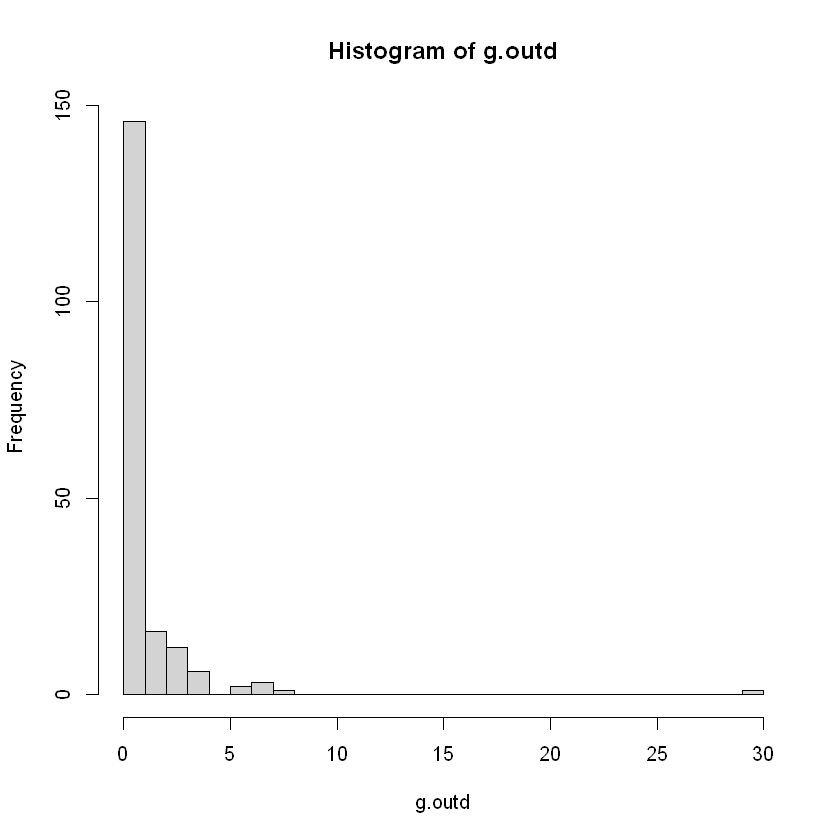

In [15]:
# Calculate the out-degree of each vertex
g.outd <- degree(g, mode = c("out"))

# View a summary of out-degree
table(g.outd)

# Make a histogram of out-degrees
hist(g.outd, breaks = 30)

# Find the vertex that has the maximum out-degree
which.max(g.outd)

#### Another measure of the importance of a given vertex is its  <span style="font-size:20px;">betweenness</span> . This is an index of how frequently the vertex lies on shortest paths between any two vertices in the network. 

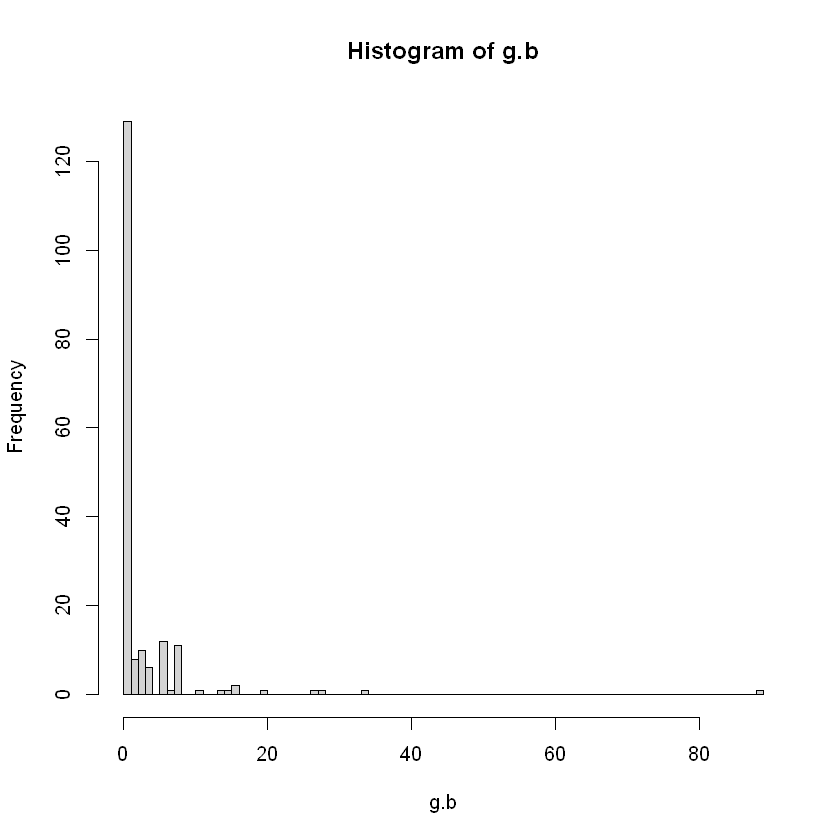

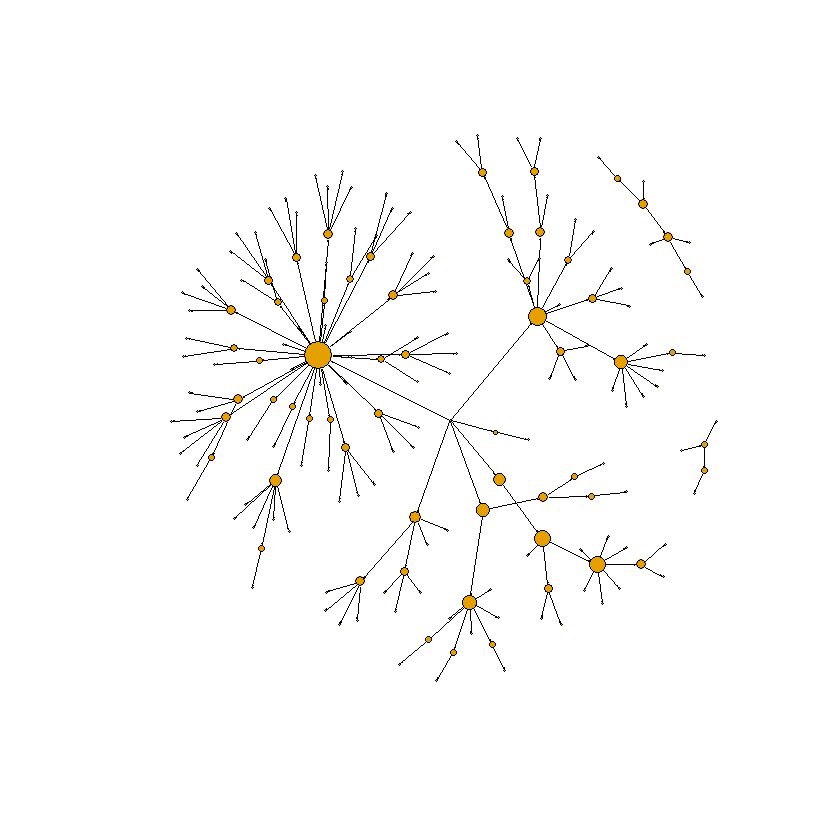

In [16]:
# Calculate betweenness of each vertex
g.b <- betweenness(g, directed = TRUE)

# Show histogram of vertex betweenness
hist(g.b, breaks = 80)

# Create plot with vertex size determined by betweenness score
plot(g, 
     vertex.label = NA,
     edge.color = 'black',
     vertex.size = sqrt(g.b)+1,
     edge.arrow.size = 0.05,
     layout = layout_nicely(g))

#### Because vertex 184 has no incoming edge in the network they appear to have low betweenness. One way to explore the importance of this vertex is by visualizing the <span style="font-size:20px;">geodesic distances</span>  (the shortest path distance) of connections going out from this individual.

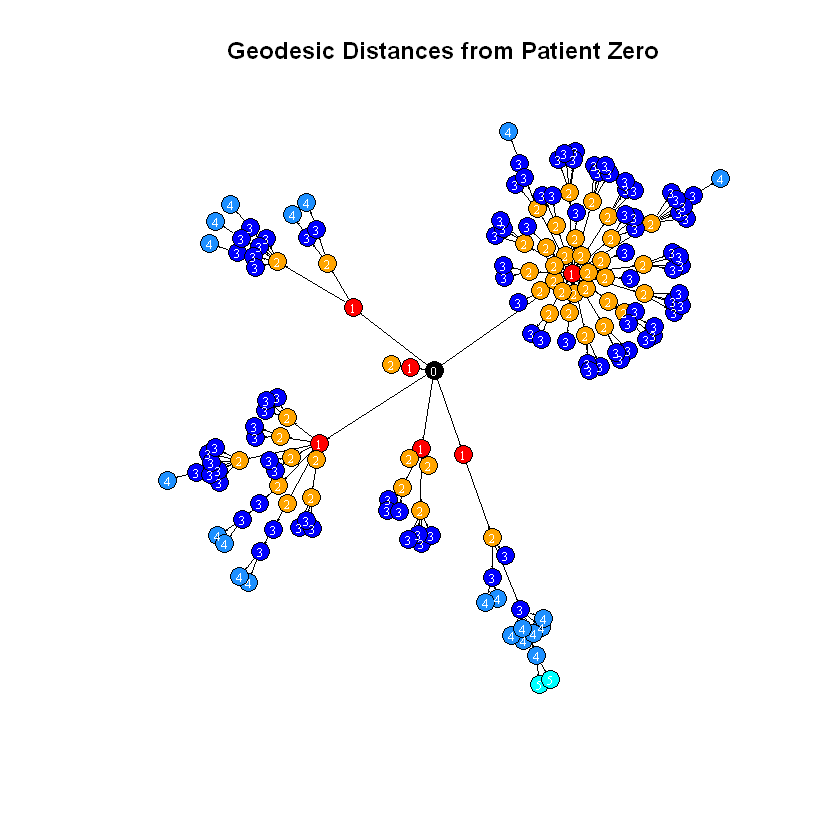

In [17]:
# Make an ego graph
g184 <- make_ego_graph(g, diameter(g), nodes = '184', mode = c("all"))[[1]]

# Get a vector of geodesic distances of all vertices from vertex 184 
dists <- distances(g184, "184")

# Create a color palette of length equal to the maximal geodesic distance plus one.
colors <- c("black", "red", "orange", "blue", "dodgerblue", "cyan")

# Set color attribute to vertices of network g184.
V(g184)$color <- colors[dists+1]

# Visualize the network based on geodesic distance from vertex 184 (patient zero).
plot(g184, 
     vertex.label = dists, 
     vertex.label.color = "white",
     vertex.label.cex = .6,
     edge.color = 'black',
     vertex.size = 7,
     edge.arrow.size = .05,
     main = "Geodesic Distances from Patient Zero"
     )


#### Individuals with high <span style="font-size:20px;"> eigenvector centrality</span>  are those that are highly connected to other highly connected individuals. 

,V1,V2
,<chr>,<chr>
1,ABBIE HOFFMAN,JENNY
2,ABBIE HOFFMAN,POLICEMAN
3,ANCHORMAN,FORREST
4,ANCHORMAN,LT DAN
5,ANCHORMAN,MARGO
6,ANCHORMAN,MRS GUMP


FORREST 
     36

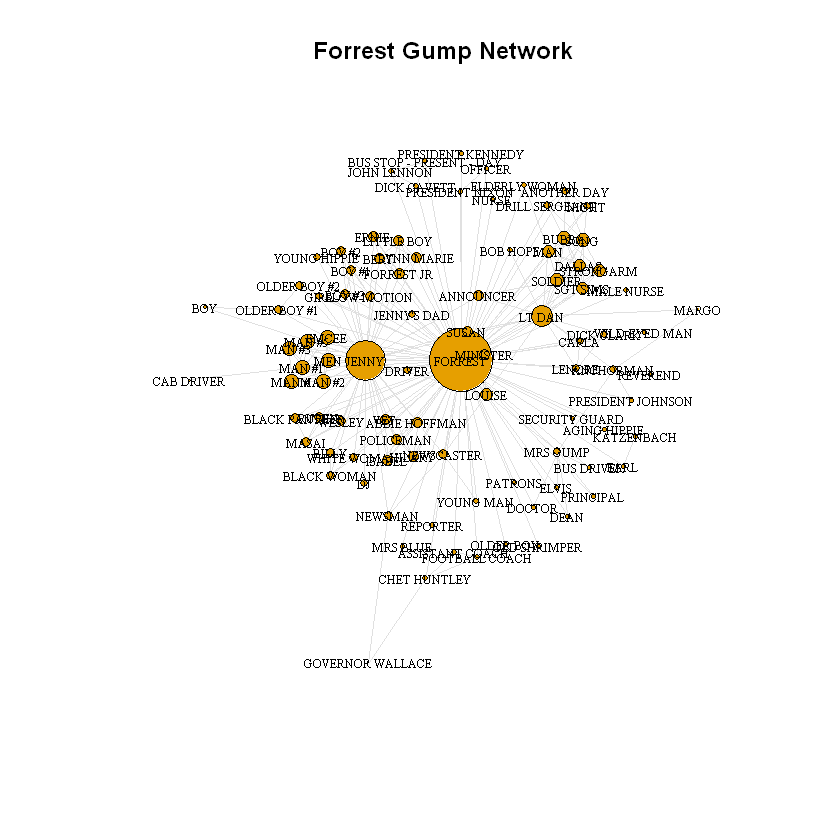

In [38]:
gump <- read.csv("Forrest Gump network data.csv", header = TRUE)

# Inspect Forrest Gump Movie dataset
head(gump)

# Make an undirected network
g <- graph_from_data_frame(gump, directed = FALSE)

# Identify key nodes using eigenvector centrality
g.ec <- eigen_centrality(g)
which.max(g.ec$vector)

# Plot Forrest Gump Network
plot(g,
vertex.label.color = "black", 
vertex.label.cex = 0.6,
vertex.size = 25*(g.ec$vector),
edge.color = 'gray88',
main = "Forrest Gump Network"
)


#### <span style="font-size:20px;">Network density</span>  is a measure of how many edges (or ties) are present in a network relative to the total number of possible edges. It is an indicator of how well connected the vertices of the graph are. <span style="font-size:20px;"> Average path length</span> calculated by determining the mean of the lengths of the shortest paths between all pairs of vertices in the network. 

In [39]:
# Get density of a graph
gd <- edge_density(g)

# Get the diameter of the graph g
diameter(g, directed = FALSE)

# Get the average path length of the graph g
g.apl <- mean_distance(g, directed = FALSE)
g.apl


[1] 4

[1] 1.994967

#### Generating <span style="font-size:20px;">random graphs</span>  is an important method for investigating how likely or unlikely other network metrics are likely to occur given certain properties of the original graph. The simplest random graph is one that has the same number of vertices as your original graph and approximately the same density as the original graph. 

IGRAPH 9d7c662 U--- 94 257 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 9d7c662:
 [1]  2-- 5  3-- 5  1-- 8  5--12  2--13  3--14  8--14  5--15 12--18 16--18
[11]  7--19 11--19 13--19 20--21  3--22 17--22 13--23  2--24 11--24  6--26
[21] 18--26  8--28  8--29 12--29 21--30 26--30 10--31 22--31 23--31 24--31
[31] 11--32 12--32 13--32 18--33 31--33 11--34 12--35 14--35 15--36 16--36
[41] 18--36 19--36  5--37 10--37 18--37 17--39 21--39  2--40  3--40 10--40
[51] 14--40  6--41 12--41 16--41 39--41 30--42 19--43 25--43 41--43  2--44
[61]  3--44  5--44  8--44 16--44 39--44 12--45  2--46  9--46 22--46 23--46
[71] 31--46 32--47 37--47  3--48 19--48  1--49 15--49  7--50 13--50 33--50
+ ... omitted several edges

[1] 0.05879661

[1] 2.819263

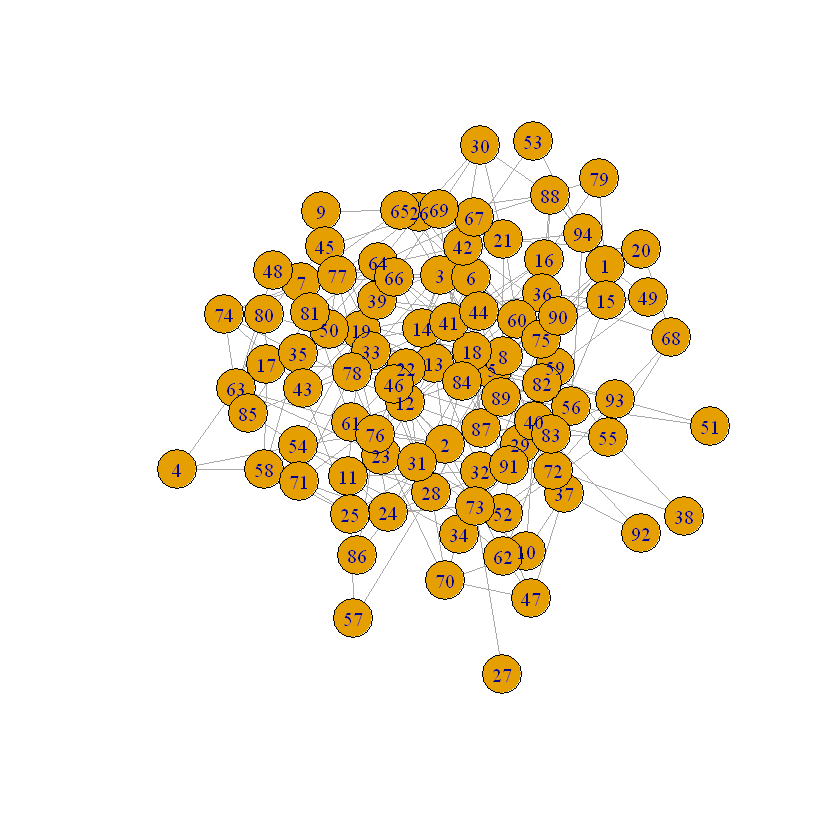

In [40]:
# Create one random graph with the same number of nodes and edges as g
g.random <- erdos.renyi.game(n = gorder(g), p.or.m = gd, type = "gnp")

g.random

plot(g.random)

# Get density of new random graph `g.random`
edge_density(g.random)

# Get the average path length of the random graph g.random
mean_distance(g.random, directed = FALSE)


<span style="font-size:20px;">Randomization test</span> will be used to calculate how many times this the forest gump mean distance is less than the random network. If the 1000 random network have larger mean distance, that means the forest gump network more highly interconnected than each random network

[1] 0

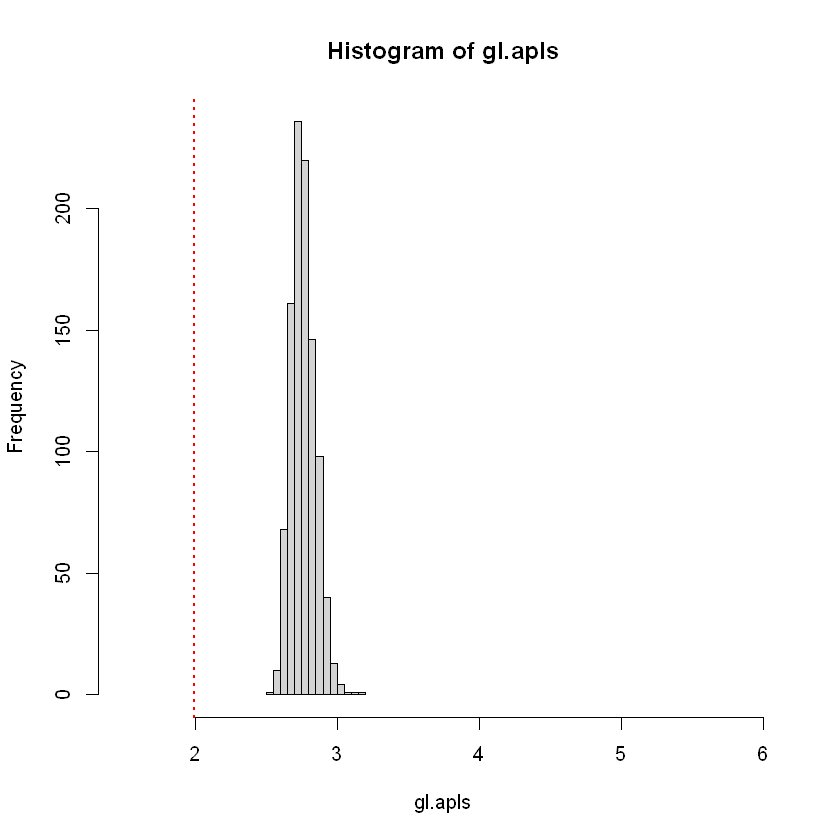

In [41]:
# NULL list of 1000 variables 
gl <- vector('list', 1000)

# Generate 1000 random graphs
for(i in 1:1000){
  gl[[i]] <- erdos.renyi.game(n = gorder(g), p.or.m = gd, type = "gnp")
}

# Calculate average path length of 1000 random graphs
gl.apls <- unlist(lapply(gl, mean_distance, directed = FALSE))

# Plot the distribution of average path lengths
hist(gl.apls, xlim = range(c(1.5, 6)))
abline(v = mean_distance(g, directed = FALSE), col = "red", lty = 3, lwd = 2)

# Calculate the proportion of graphs with an average path length lower than our observed(forest gump)
mean(gl.apls < mean_distance(g))

<span style="font-size:20px;">Triangles (also known as triads) </span> means an edge exists between three given vertices. It will be used to calculate the <span style="font-size:20px;"> transitivity of the network </span> which is the proportion of all possible triangles in the network that are closed. 
 

In [42]:
# Show all triangles in the network.
matrix(triangles(g), nrow = 3)

# Count the number of triangles that vertex "BUBBA" is in.
count_triangles(g, vids='BUBBA')

# Calculate the global transitivity of the network.
g.tr <- transitivity(g)
g.tr

# Calculate the local transitivity for vertex BUBBA.
transitivity(g, vids='BUBBA', type = "local")


36,36,36,36,36,36,36,36,36,36,⋯,11,12,30,30,30,51,7,17,18,15
1,1,1,1,2,4,4,6,6,6,⋯,13,13,61,51,51,61,8,22,28,21
83,38,39,66,68,57,24,27,75,40,⋯,70,70,84,84,61,84,69,42,5,72


[1] 37

[1] 0.1918082

[1] 0.6727273

In [43]:
# Calculate average transitivity of 1000 random graphs
gl.tr <- lapply(gl, transitivity)
gl.trs <- unlist(gl.tr)

# Get summary statistics of transitivity scores
summary(gl.trs)

# Calculate the proportion of graphs with a transitivity score higher than Forrest Gump's network
mean(gl.trs > transitivity(g))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02415 0.05366 0.06163 0.06123 0.06859 0.09755 

[1] 0

#### In a <span style="font-size:20px;">clique</span>  every two unique nodes are adjacent - that means that every individual node is connected to every other individual node in the clique. A clique is maximal if it cannot be extended to a larger clique.

In [44]:
# Identify the largest cliques in the network
largest_cliques(g)

# Determine all maximal cliques in the network and assign to object 'clq'
clq <- max_cliques(g)

# Calculate the size of each maximal clique.
table(unlist(lapply(clq, length)))

#Output
#Size of clique
#How many cliques with the same size 

[[1]]
+ 9/94 vertices, named, from 9c953a7:
[1] EMCEE   FORREST MEN     MAN #5  MAN #3  MAN #2  MAN #1  MAN #   JENNY  

[[2]]
+ 9/94 vertices, named, from 9c953a7:
[1] FORREST   LT DAN    STRONGARM SONG      SOLDIER   SGT SIMS  MAN      
[8] DALLAS    BUBBA    



 2  3  4  5  6  7  9 
12 24  7  2  4  2  2 

#### Subgraphs to show the two largest cliques with size 9

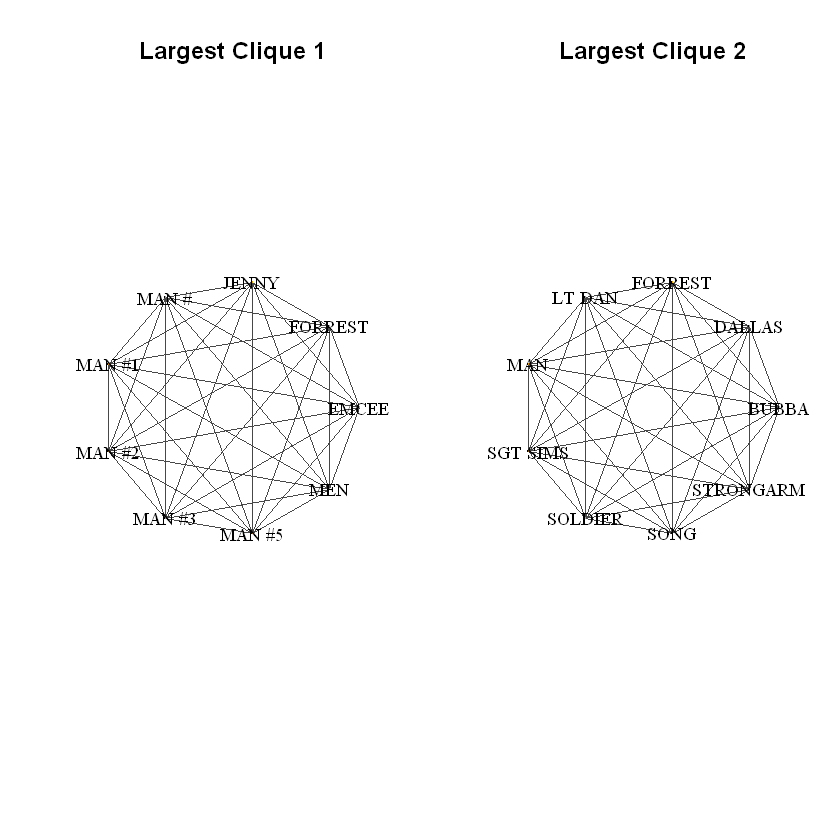

In [45]:
# Assign largest cliques output to object 'lc'
lc <- largest_cliques(g)

# Create two new undirected subgraphs, each containing only the vertices of each largest clique.
gs1 <- as.undirected(subgraph(g, lc[[1]]))
gs2 <- as.undirected(subgraph(g, lc[[2]]))


# Plot the two largest cliques side-by-side

par(mfrow=c(1,2)) # To plot two plots side-by-side

plot(gs1,
     vertex.label.color = "black", 
     vertex.label.cex = 0.9,
     vertex.size = 0,
     edge.color = 'gray28',
     main = "Largest Clique 1",
     layout = layout.circle(gs1)
)

plot(gs2,
     vertex.label.color = "black", 
     vertex.label.cex = 0.9,
     vertex.size = 0,
     edge.color = 'gray28',
     main = "Largest Clique 2",
     layout = layout.circle(gs2)
)


#### <span style="font-size:20px;">Assortativity</span>  is a measure of the tendency for nodes in a network to connect to other nodes that have a similar degree.

[1] 0.1319444

[1] 0.4615385

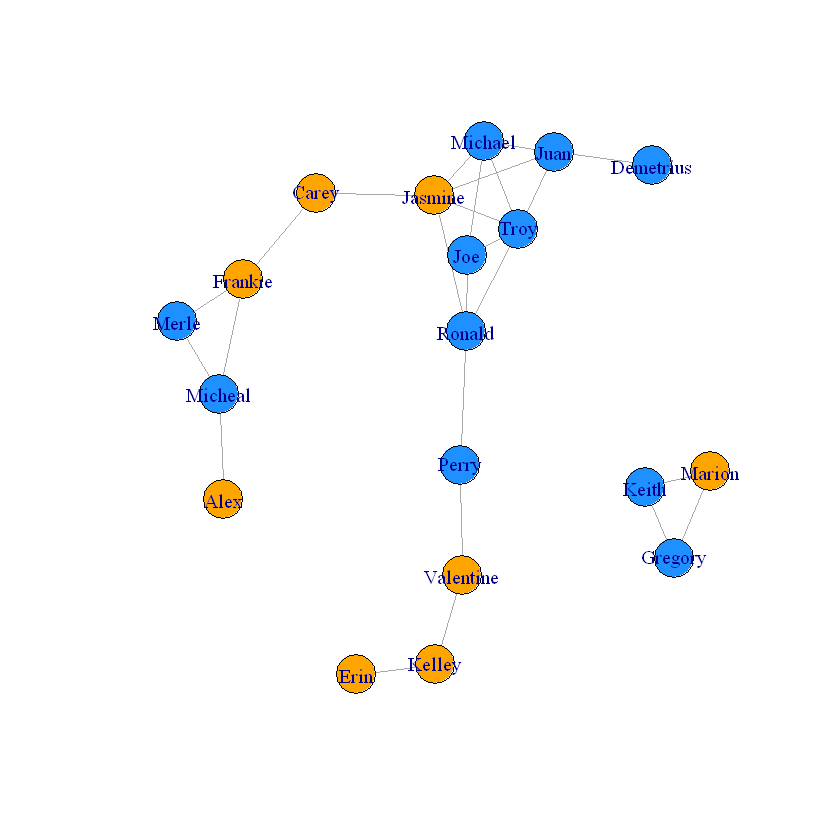

In [46]:
# Plot the network
plot(g1)

# Convert the gender attribute into a numeric value
values <- as.numeric(factor(V(g1)$gender))

# Calculate the assortativity of the network based on gender
assortativity(g1, values)

# Calculate the assortativity degree of the network
assortativity.degree(g1, directed = FALSE)

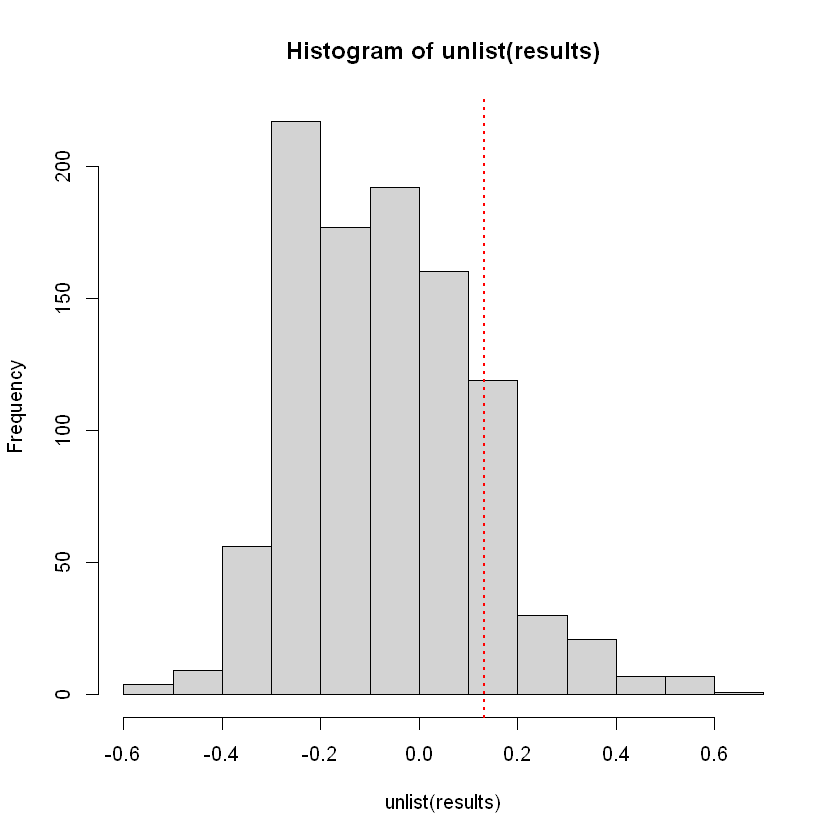

In [47]:
# Calculate the observed assortativity
observed.assortativity <- assortativity(g1, values)

# Calculate the assortativity of the network randomizing the gender attribute 1000 times
results <- vector('list', 1000)
for(i in 1:1000){
  results[[i]] <- assortativity(g1, sample(values))
}

# Plot the distribution of assortativity values and add a red vertical line at the original observed value
hist(unlist(results))
abline(v = observed.assortativity, col = "red", lty = 3, lwd=2)



#### The <span style="font-size:20px;">reciprocity</span> of a directed network reflects the proportion of edges that are symmetrical. That is, the proportion of outgoing edges that also have an incoming edge. 

,from,to
,<int>,<int>
1,45,1
2,45,2
3,172,3
4,180,4
5,45,5
6,180,6


[1] 0

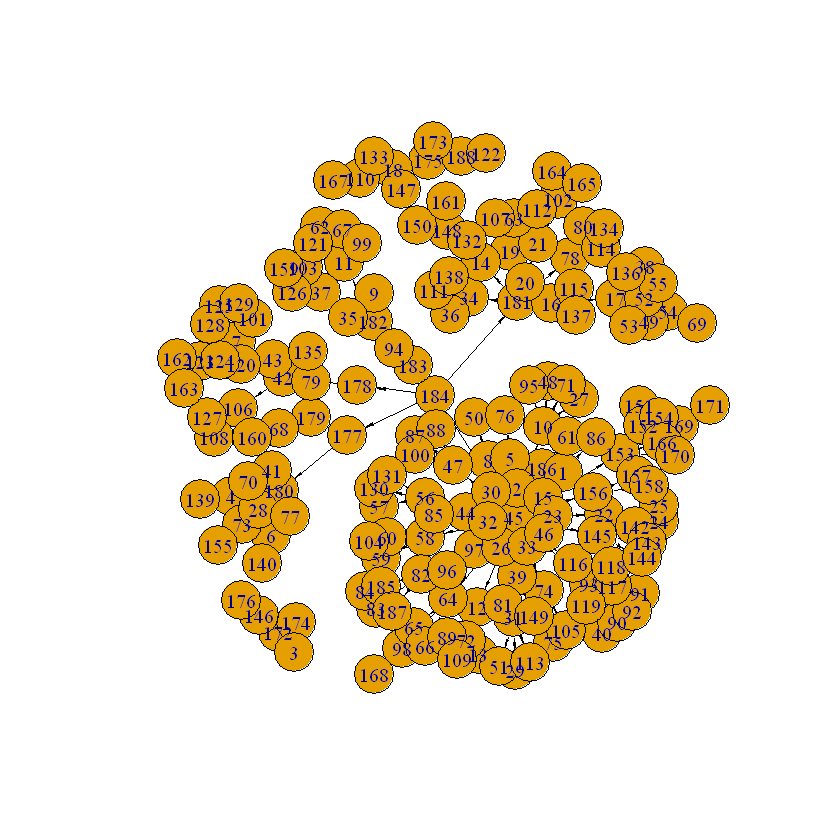

In [37]:
# Make a plot of the chimp grooming network
plot(g,
     edge.color = "black",
     edge.arrow.size = 0.3,
     edge.arrow.width = 0.5)

# Calculate the reciprocity of the graph
reciprocity(g)

#### The <span style="font-size:20px;">Fast-greedy </span> community detection. It works to build larger communities by adding vertices to each community one by one and assessing a modularity score at each step.


In [61]:
zachary <- read.table("out.ucidata-zachary", header = TRUE, sep = " ")

zachary.mat <- as.matrix(zachary[,1:2])
head(zachary)

# Convert friends matrix to an igraph object
g <- graph.edgelist(zachary.mat, directed = FALSE)

# is the graph directed?
is.directed(g)

,col1,col2
,<int>,<int>
1,1,2
2,1,3
3,2,3
4,1,4
5,2,4
6,3,4


[1] FALSE

Community sizes
 1  2  3 
 8 17  9 

 [1] 1 3 3 3 1 1 1 3 2 3 1 1 3 3 2 2 1 3 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2

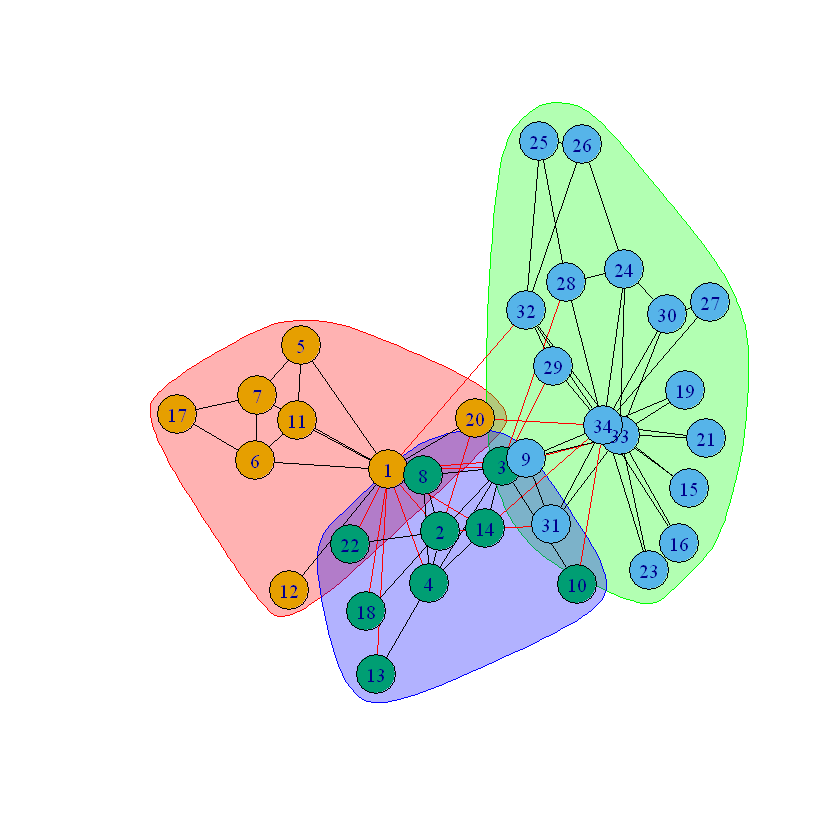

In [62]:
# Perform fast-greedy community detection on network graph
kc = fastgreedy.community(g)

# Determine sizes of each community
sizes(kc)

# Determine which individuals belong to which community
membership(kc)

# Plot the community structure of the network
plot(kc, g)


#### The <span style="font-size:20px;">Edge-betweenness </span> community detection. It works by dividing the network into smaller and smaller pieces until it finds edges that it perceives to be 'bridges' betweem communities. 


Community sizes
 1  2  3  4  5 
10  6  5 12  1 

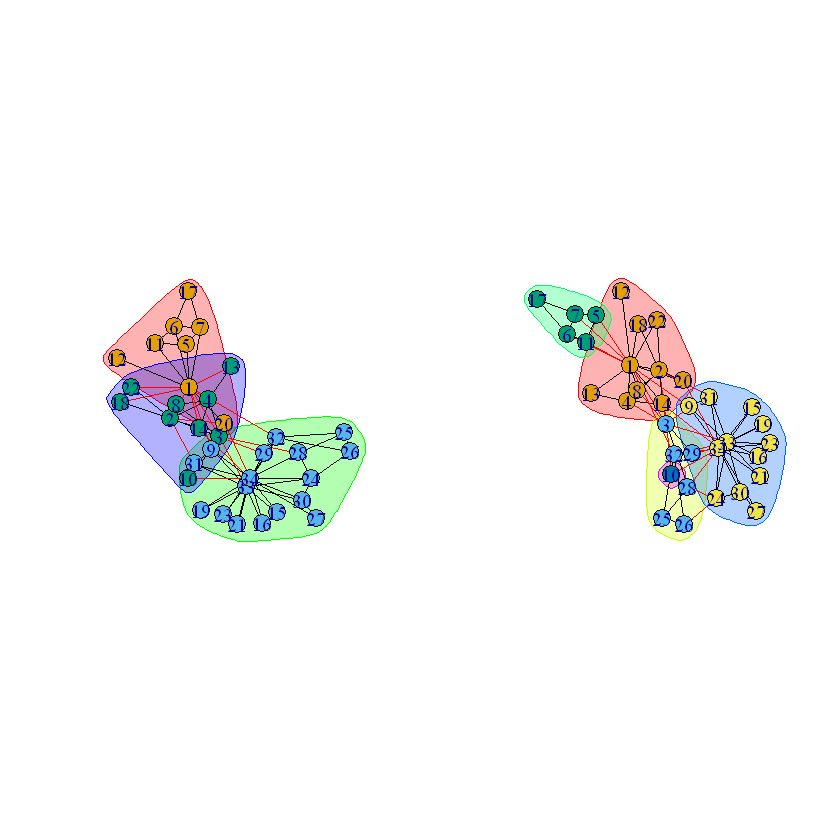

In [63]:
# Perform edge-betweenness community detection on network graph
gc = edge.betweenness.community(g)

# Determine sizes of each community
sizes(gc)

# Plot community networks determined by fast-greedy and edge-betweenness methods side-by-side
par(mfrow = c(1, 2)) 
plot(kc, g)
plot(gc, g)

In [67]:
# Set a vertex attribute called 'color' to 'dodgerblue' 
g <- set_vertex_attr(g, "color", value = "dodgerblue")

# Redraw the graph and make the vertex size 1
graphjs(g, vertex.size = 1)



HTML widgets cannot be represented in plain text (need html)

In [71]:
# Create numerical vector of vertex eigenvector centralities 
ec <- as.numeric(eigen_centrality(g)$vector)

# Create new vector 'v' that is equal to the square-root of 'ec' multiplied by 5
v <- 2*sqrt(ec)

# Plot threejs plot of graph setting vertex size to v
graphjs(g, vertex.size = v)


HTML widgets cannot be represented in plain text (need html)

In [72]:
# Create an object 'i' containin the memberships of the fast-greedy community detection
i <-  membership(kc)

# Check the number of different communities
sizes(kc)

# Add a color attribute to each vertex, setting the color based on community membership
g <- set_vertex_attr(g, "color", value = c("yellow", "blue", "red")[i])

# Plot the graph using threejs
graphjs(g)


Community sizes
 1  2  3 
 8 17  9 

HTML widgets cannot be represented in plain text (need html)